In [ ]:
# PROJECT TITLE GOES HERE

## 2024-25 Group: X

*This is the MN5813 Group Assignment from Group X.*

- Student 1 2608503
- Student 2 2609572
- Student 3 2601959

## Project summary

This project examines significant patterns, trends, and attributes of Olympic athletes through an extensive historical dataset comprising over 260,000 records. The goal is to figure out how things like age, gender, nationality, season, and event type affect how well people do in the Olympics. The dataset has information about the athletes' demographics, physical traits, competition details, and medal results. We turn the raw data into useful insights by using data cleaning, wrangling, and basic statistical visualization methods.

The project uses a structured way of analyzing things. To start the data is imported from a compressed source and turned into a DataFrame that can be used. To make the data better, missing values, inconsistencies and duplicates are found and fixed. To help make deeper comparisons between athletes, more variables are created, such as a combined Team-NOC column and a BMI calculation.

Visualizations show important patterns, like how medals are given out and how many people participate in the Summer and Winter Games. For example, a lot more athletes take part in the Summer Olympics than in the Winter Olympics. These patterns give us a better idea of how people around the world are getting involved in sports and what kinds of athletes they are. 
I included separate visual analyses for Asian and European countries to understand regional differences in Olympic medal performance.

In general, the project shows how data analytics tools like Python, pandas, and seaborn can be used to turn big sets of raw data into useful information. The results show how important it is to prepare structured data and use visual analysis when looking at complex real-world datasets.


## Generative AI

## Introduction

In [3]:
# Add your introduction here [app. 200-300 words]

The Olympics bring together athletes from all over the world, each with their own history, body type, and level of skill. The Olympics are a great chance to look into how things like age, gender, nationality aand sport type affect how well athletes do. They have data going back more than 100 years.

There are more than 260,000 athlete records in this dataset, which includes information like height, weight, team, event, and whether they won a medal. The goal is to find patterns in this data that are interesting and figure out what makes an Olympic athlete stand out. We will use Python, pandas, and seaborn to clean up the data, add new features, and see patterns.

The first step in the project is to clean up the raw data by filling in missing or inconsistent values and adding new columns like BMI or team IDs. Then we look at important trends, like who participates more in the Summer or Winter Games, how medal distribution changes by gender or country, and more, using charts and graphs.

This kind of analysis shows how data science can help you understand big datasets and find stories in the numbers.

In [ ]:
# Formulate project aim & set of objectives

## Setup

### Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [7]:
import requests 
from zipfile import ZipFile
import io

url = 'https://raw.githubusercontent.com/malavikakhaitan23/MN5813-Group-Project/main/athlete_events.csv.zip'

retrived_url = requests.get(url)
zip_file = ZipFile(io.BytesIO(retrived_url.content))



### Convert into DataFrame

In [18]:
df = pd.read_csv(zip_file.open('athlete_events.csv'))

In [7]:
# SUGGESTION: Merge data from multiple files into a single DataFrame

Display the first few rows and basic information about the DataFrame `df` you have created from `data_source`.

In [9]:
 print(df.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [12]:
 print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


## Data management

### Data cleaning

In [17]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
BMI        64263
dtype: int64

In [18]:
df["ID"]=df["ID"].astype(str)
print(df.info())           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  object 
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  BMI     206853 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 33.1+ MB
None


In [49]:
df.drop_duplicates()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,Team_and_NOC
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.691358,China(CHN)
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.761246,China(CHN)
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN,Denmark(DEN)
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN,Denmark/Sweden(DEN)
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23.959094,Netherlands(NED)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,27.776911,Poland-1(POL)
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,19.047004,Poland(POL)
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,19.047004,Poland(POL)
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,28.049671,Poland(POL)


In [62]:
# TODO: Anything else?


In [12]:
df.dropna()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [11]:
# TODO: Anything else?
Avg_Height = df["Height"].mean()
print(Avg_Height)

175.33896987366376


### Data wrangling

In [25]:
df["Age_Group"].value_counts()


Age_Group
19-25    130181
26-35     94417
0-18      20660
36+       16384
Name: count, dtype: int64

In [14]:
df["Team_and_NOC"]=df["Team"]+"("+df["NOC"]+")"
print(df.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal         Team_and_NOC  
0       Basketball Men's Basketball   NaN           China(CHN)  
1      Judo Men's Extra-Ligh

In [61]:
df["BMI"]=df["Weight"]/(df["Height"]/100)**2
print(df.head())

  ID                      Name Sex   Age  Height  Weight            Team  NOC  \
0  1                 A Dijiang   M  24.0   180.0    80.0           China  CHN   
1  2                  A Lamusi   M  23.0   170.0    60.0           China  CHN   
2  3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark  DEN   
3  4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN   
4  5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal        BMI         Team_and_NOC  
0       Basketball Men's Basketball   NaN  24.691358           China(CHN)  
1      Judo 

## Data analysis

In [77]:
# TODO: Conduct data analysis

In [ ]:
#Average Age 

In [16]:
Avg_Age = df["Age"].mean()
print(Avg_Age)

25.556898357297374


In [ ]:
#Top 10 Countries with Gold Medals

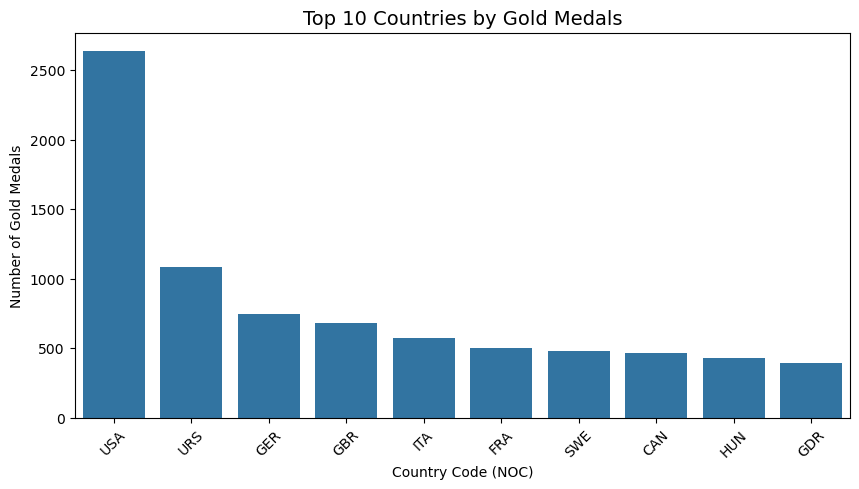

In [26]:
gold_df = df[df["Medal"] == "Gold"]
top10_gold = gold_df["NOC"].value_counts().head(10)
top10_gold
plt.figure(figsize=(10,5))
sns.barplot(x=top10_gold.index, y=top10_gold.values)
plt.title("Top 10 Countries by Gold Medals", fontsize=14)
plt.xlabel("Country Code (NOC)")
plt.ylabel("Number of Gold Medals")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Atheletes with Most Medals in each sport

In [22]:
medal_df = df[df["Medal"].notnull()]
medals_by_athlete_sport = medal_df.groupby(["Sport", "Name"]).size().reset_index(name="Medal_Count")

top_in_each_sport = medals_by_athlete_sport.loc[
    medals_by_athlete_sport.groupby("Sport")["Medal_Count"].idxmax()
]
top_in_each_sport.sort_values(by="Medal_Count", ascending=False)

,Sport,Name,Medal_Count
23908,Swimming,"Michael Fred Phelps, II",28
12760,Gymnastics,Larysa Semenivna Latynina (Diriy-),18
9406,Fencing,Edoardo Mangiarotti,13
4934,Biathlon,Ole Einar Bjrndalen,13
6241,Canoeing,Birgit Fischer-Schmidt,12
...,...,...,...
6860,Cricket,Alfred James Bowerman,1
262,Alpinism,Antarge Sherpa,1
17654,Roque,Charles Brown,1
17225,Military Ski Patrol,Adrien Louis Albert Vandelle,1


## Data visualisation

In [19]:
# TODO: Create at least two meaningful visualisations

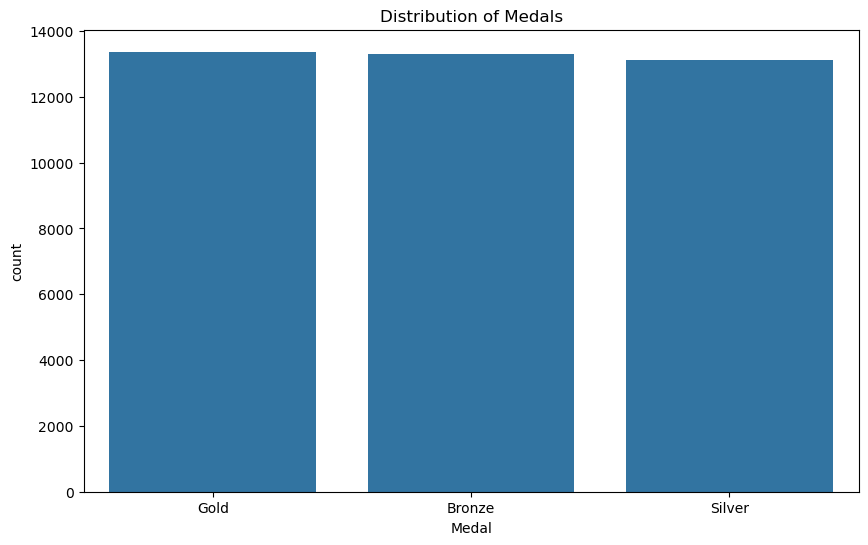

In [64]:

plt.figure(figsize=(10, 6))
sns.countplot(x="Medal", data=df)
plt.title("Distribution of Medals")
plt.show()

*Medal won in european countires

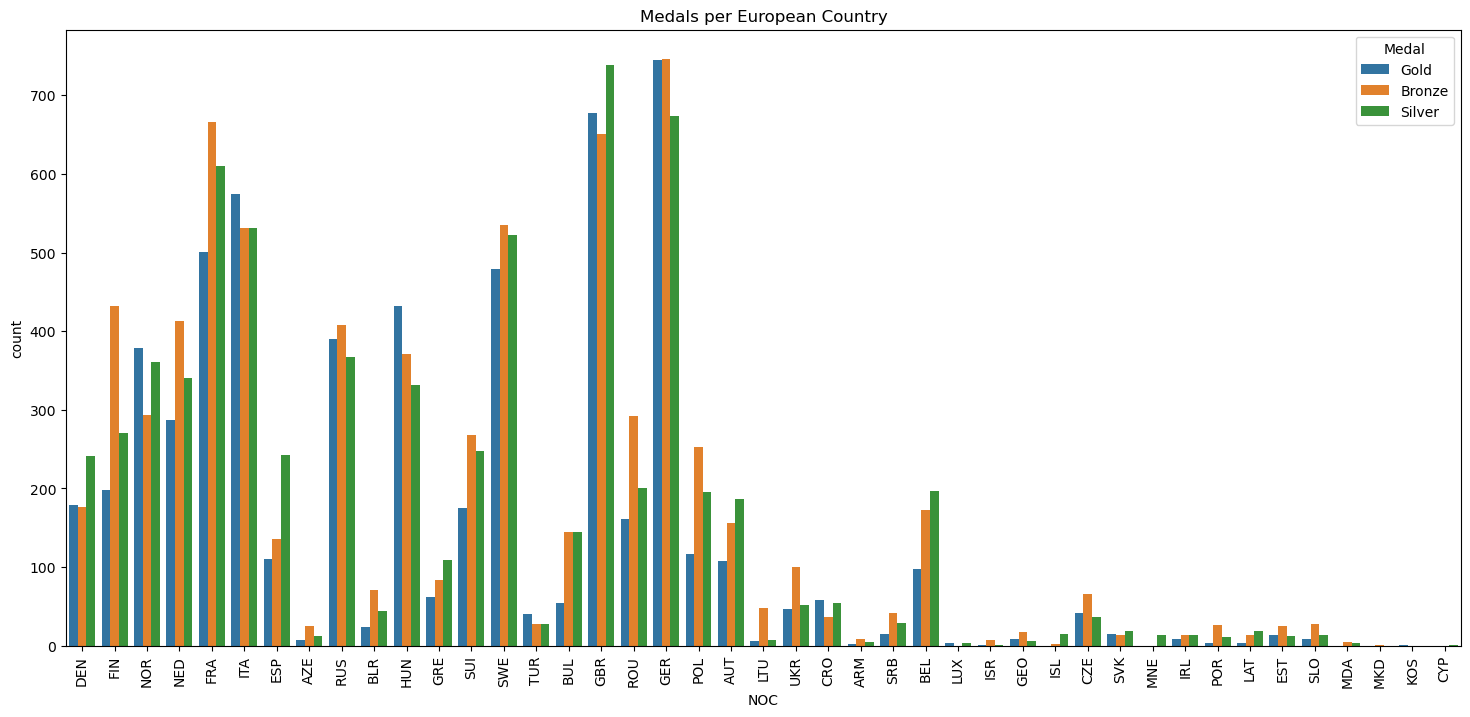

In [59]:
europe_nocs = [
    "ALB","AND","ARM","AUT","AZE","BEL","BLR","BIH","BUL","CRO","CYP","CZE","DEN","EST",
    "FIN","FRA","GEO","GER","GBR","GRE","HUN","ISL","IRL","ISR","ITA","KOS","LAT","LTU",
    "LUX","MKD","MLT","MDA","MNE","NED","NOR","POL","POR","ROU","RUS","SMR","SRB","SVK",
    "SLO","ESP","SWE","SUI","TUR","UKR"
]
df_europe = df[df["NOC"].isin(europe_nocs)]
df_medals_europe = df_europe[df_europe["Medal"].notna()]
plt.figure(figsize=(18, 8))
sns.countplot(x="NOC", hue="Medal", data=df_medals_europe)
plt.title("Medals per European Country")
plt.xticks(rotation=90)
plt.show()

*Medals won asian countries

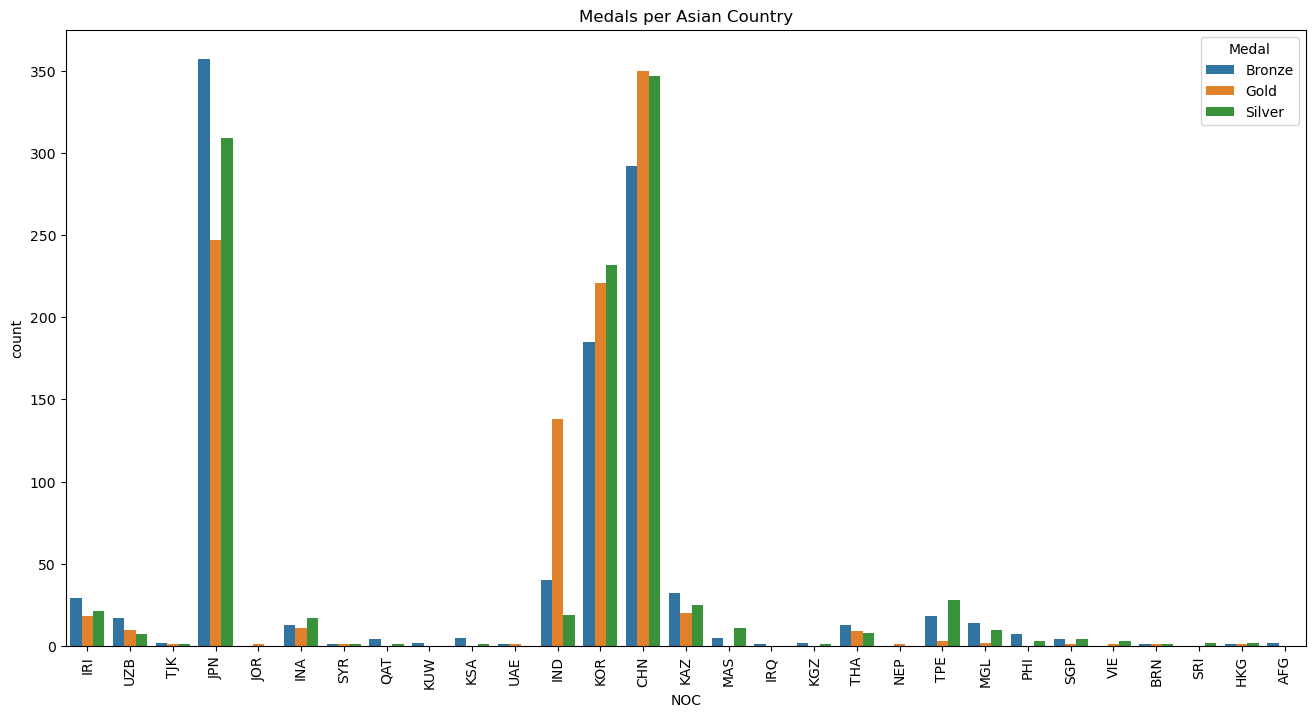

In [60]:
asian_nocs = [
    "CHN","IND","JPN","KOR","KAZ","IRI","TPE","THA","MAS","INA","PHI","SGP","HKG",
    "QAT","UAE","KSA","KUW","BRN","JOR","IRQ","SYR","LBN","PLE","VIE","MGL",
    "KGZ","TJK","UZB","AFG","BAN","MDV","NEP","SRI","TLS"
]
df_asia = df[df["NOC"].isin(asian_nocs)]
df_medals_asia = df_asia[df_asia["Medal"].notna()]
plt.figure(figsize=(16, 8))
sns.countplot(x="NOC", hue="Medal", data=df_medals_asia)
plt.title("Medals per Asian Country")
plt.xticks(rotation=90)
plt.show()

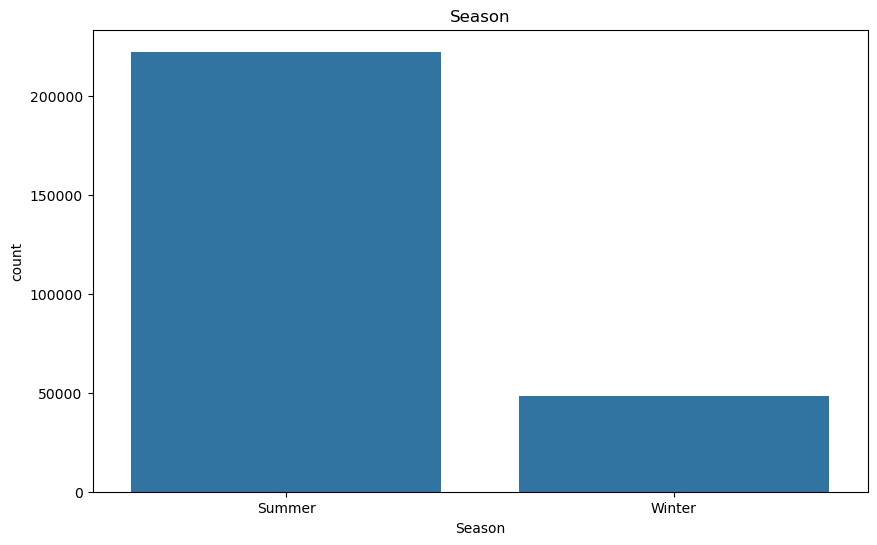

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Season", data=df)
plt.title("Season")
plt.show()

In [21]:
# SUGGESTION: Use a small multiple

## Data export

In [89]:
df.to_csv("athlete_events.csv",index=False)

In [23]:
# TODO: Ensure that you can successfully load the exported CSV file

In [24]:
# TODO: Export visualizations as image files

## Conclusion

In [25]:
# Add your conclusion here [app. 300-500 words].

## References

1. Python-(https://docs.python.org/3/library/index.html) 28-11-2025 
2. Panda-(https://www.geeksforgeeks.org/pandas/introduction-to-pandas-in-python/) 28-11-2025 
3. Reference 3
4. ...

*(References must be complete and contain a link to the original source; usually a DOI link.)*

## Appendices

### Appendix A

In [26]:
# Appendix A goes here

### Appendix B

In [27]:
# Appendix B goes here